<a href="https://colab.research.google.com/github/08deepika/Interpolation_NBB/blob/main/Interpolation_NBB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import urllib.request


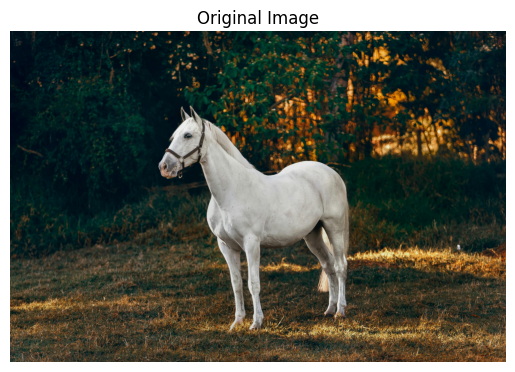

In [ ]:
import requests
from PIL import Image
from io import BytesIO
import numpy as np
import matplotlib.pyplot as plt
# Download the image from the URL
url = 'https://images.pexels.com/photos/1996332/pexels-photo-1996332.jpeg?cs=srgb&dl=pexels-wildlittlethingsphoto-1996332.jpg&fm=jpg'
response = requests.get(url)

# Open the image from the response content
image = Image.open(BytesIO(response.content))

# Show the original image
plt.imshow(image)
plt.axis('off')  # Hide axes for a cleaner view
plt.title("Original Image")
plt.show()

In [ ]:
from google.colab import files

uploaded = files.upload()

Saving Horse.jpg.jpg to Horse.jpg (1).jpg


In [ ]:
print(uploaded.keys())

dict_keys(['Horse.jpg (1).jpg'])


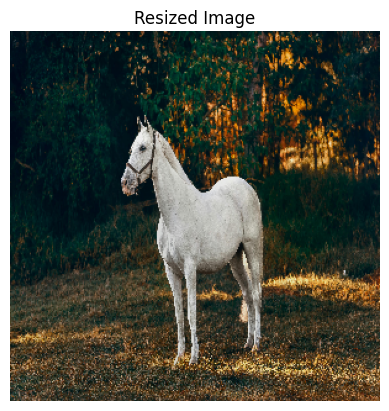

In [ ]:
# Step 2: Convert the image to a format OpenCV understands
image_pil = Image.open(BytesIO(response.content))  # Open the image using PIL
image_np = np.array(image_pil)  # Convert the PIL image to a NumPy array

# Step 3: Convert the RGB image to BGR for OpenCV
image_cv = cv2.cvtColor(image_np, cv2.COLOR_RGB2BGR)

# Step 4: Resize the image
resized = cv2.resize(image_cv, (300, 300))  # Resize to 300x300 (width x height)

# Step 5: Show the resized image using matplotlib
plt.imshow(cv2.cvtColor(resized, cv2.COLOR_BGR2RGB))  # Convert BGR back to RGB for display
plt.title("Resized Image")
plt.axis("off")
plt.show()

In [ ]:
def nearest_neighbour(image, new_h, new_w):
    """Nearest neighbour interpolation algorithm for Image resizing."""

    h, w = image.shape[:2]
    rescaled_image = np.zeros((new_h, new_w, 3))

    # 1. transform from output to input pixel coordinates
    mapped_h = np.arange(new_h) * (h / new_h)
    mapped_w = np.arange(new_w) * (w / new_w)

    # 2. compute the nearest pixel in input space for every output pixel
    ### inefficient way to compute new image ###
    for i in range(mapped_h.size):
        for j in range(mapped_w.size):
            rescaled_image[i, j] = image[int(mapped_h[i]), int(mapped_w[j])]

    return rescaled_image

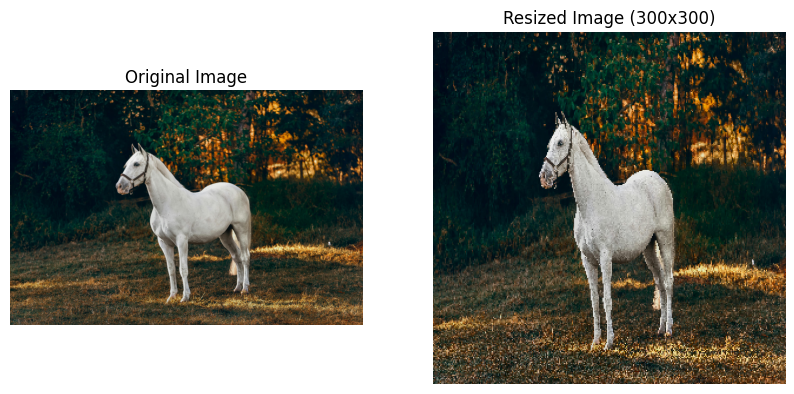

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import requests
from io import BytesIO

def nearest_neighbour(image, new_h, new_w):
    """Nearest neighbour interpolation algorithm for Image resizing."""
    h, w = image.shape[:2]
    rescaled_image = np.zeros((new_h, new_w, 3), dtype=np.uint8)  # Ensure dtype is uint8 for proper visualization

    # 1. transform from output to input pixel coordinates
    mapped_h = np.arange(new_h) * (h / new_h)
    mapped_w = np.arange(new_w) * (w / new_w)

    # 2. compute the nearest pixel in input space for every output pixel
    for i in range(mapped_h.size):
        for j in range(mapped_w.size):
            rescaled_image[i, j] = image[int(mapped_h[i]), int(mapped_w[j])]

    return rescaled_image

# Step 1: Download and open the image
url = 'https://images.pexels.com/photos/1996332/pexels-photo-1996332.jpeg?cs=srgb&dl=pexels-wildlittlethingsphoto-1996332.jpg&fm=jpg'
response = requests.get(url)
original_image = Image.open(BytesIO(response.content))

# Step 2: Convert to NumPy array
original_image_np = np.array(original_image)

# Step 3: Resize the image using nearest_neighbour function
new_h, new_w = 300, 300  # Desired dimensions
resized_image_np = nearest_neighbour(original_image_np, new_h, new_w)

# Step 4: Display the original and resized images side by side
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(original_image_np)
plt.title("Original Image")
plt.axis("off")

# Resized image
plt.subplot(1, 2, 2)
plt.imshow(resized_image_np)
plt.title(f"Resized Image ({new_h}x{new_w})")
plt.axis("off")

plt.show()


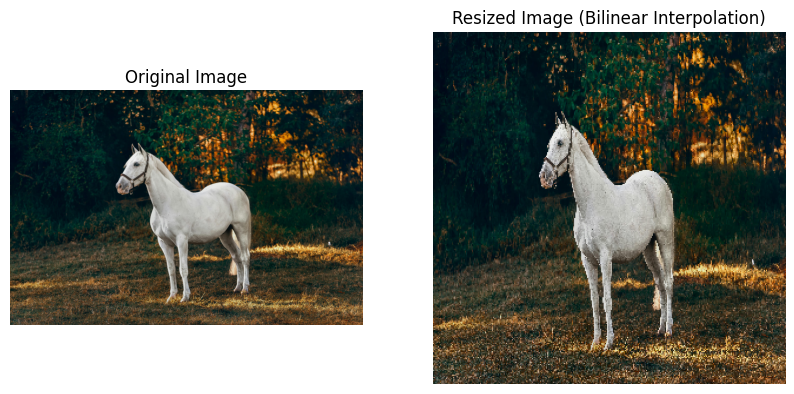

In [ ]:
# Function for bilinear interpolation
def interpolate_pixel(image, points, axis=1):
    p1, p2, p3 = points
    pixel_1, pixel_2 = image[p1[0], p1[1]], image[p2[0], p2[1]]
    d1, d2 = p3[axis] - p1[axis], p2[axis] - p3[axis]
    pixel_1_2 = pixel_1 * d2 + pixel_2 * d1
    return pixel_1_2

def bilinear_interpolation(image, new_h, new_w):
    """Bilinear interpolation for image resizing."""
    h, w = image.shape[:2]
    rescaled_image = np.zeros((new_h, new_w, 3))

    mapped_h = np.arange(new_h) * (h / new_h)
    mapped_w = np.arange(new_w) * (w / new_w)

    mapped_h[mapped_h >= h] = h - 1
    mapped_w[mapped_w >= w] = w - 1

    for i in range(new_h):
        for j in range(new_w):
            mi, mj = mapped_h[i], mapped_w[j]

            i1, j1 = int(mi), int(mj)
            i2, j2 = min(i1 + 1, h - 1), min(j1 + 1, w - 1)

            pixel_i1j1 = image[i1, j1]
            pixel_i1j2 = image[i1, j2]
            pixel_i2j1 = image[i2, j1]
            pixel_i2j2 = image[i2, j2]

            dy, dx = mi - i1, mj - j1

            pixel_top = (1 - dx) * pixel_i1j1 + dx * pixel_i1j2
            pixel_bottom = (1 - dx) * pixel_i2j1 + dx * pixel_i2j2
            rescaled_image[i, j] = (1 - dy) * pixel_top + dy * pixel_bottom

    return rescaled_image.astype(np.uint8)

# Resize using bilinear interpolation
resized_image = bilinear_interpolation(image_np, 300, 300)  # Resize to (300, 300)

# Show original and resized images
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_np)
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 2, 2)
plt.imshow(resized_image)
plt.title("Resized Image (Bilinear Interpolation)")
plt.axis("off")

plt.show()


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
#Load the image
image = Image.open('/content/Horse.jpg.jpg')

#Display the Image
plt.imshow(image)
plt.axis('off')
plt.show()

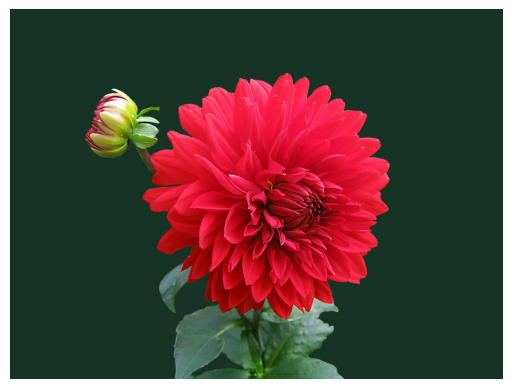

In [ ]:
#Load the image
image1 = Image.open('/content/pexels-pixabay-60597.jpg')

#Display the Image (Dimensions 3648 x 2736)
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
# Function to calculate PSNR
def calculate_psnr(image1, resized):
    mse = np.mean((image1 - cv2.resize(resized, (image1.shape[1], image1.shape[0]), interpolation=cv2.INTER_LINEAR)) ** 2)
    if mse == 0:
        return float('inf')  # If images are identical
    psnr = 10 * np.log10(255**2 / mse)
    return psnr

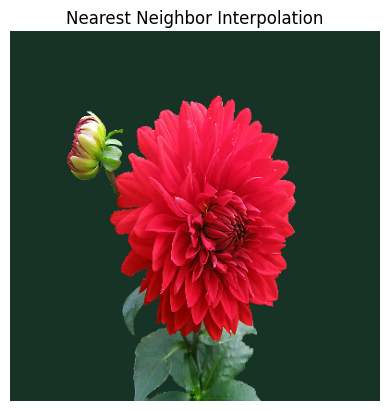

In [ ]:
# Convert to NumPy array (for OpenCV)
image1 = np.array(image1)

# Resize using Nearest Neighbor Interpolation
nni_resized = cv2.resize(image1, (400, 400), interpolation=cv2.INTER_NEAREST)

# Show output using Matplotlib
plt.imshow(nni_resized)
plt.title("Nearest Neighbor Interpolation")
plt.axis("off")
plt.show()


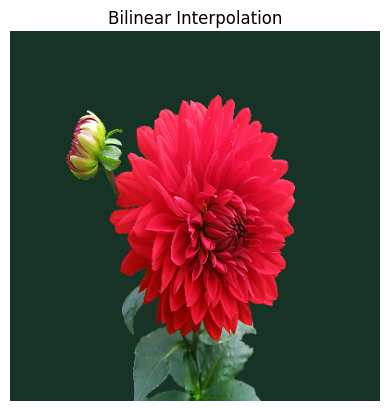

In [ ]:
#Resize using bilinear interpolation
bilinear_resized = cv2.resize(image1, (400, 400), interpolation = cv2.INTER_LINEAR)
#Display the image
plt.imshow(bilinear_resized)
plt.title("Bilinear Interpolation")
plt.axis('off')
plt.show()

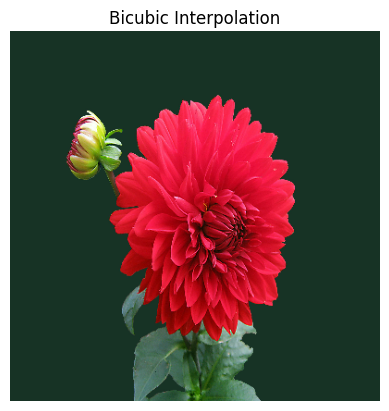

In [ ]:
#Resize using bicubic interpolation
bicubic_resized = cv2.resize(image1, (400,400), interpolation = cv2.INTER_CUBIC)
#Display the image
plt.imshow(bicubic_resized)
plt.title('Bicubic Interpolation')
plt.axis('off')
plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

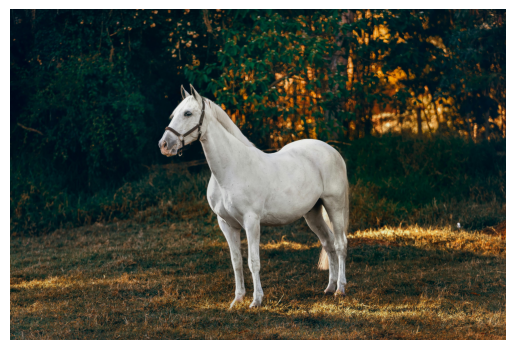

In [ ]:
#Load the image
image = Image.open('/content/Horse.jpg.jpg')

#Display the Image
plt.imshow(image)
plt.axis('off')
plt.show()

In [ ]:
print("Original Image shape:", original.shape)
for method, resized_image in resized_images.items():
    print(f"{method} resized image shape:", resized_image.shape)


Original Image shape: (3009, 4514, 3)
Nearest Neighbor resized image shape: (300, 300, 3)
Bilinear resized image shape: (300, 300, 3)
Bicubic resized image shape: (300, 300, 3)
Spline (Lanczos Approx) resized image shape: (300, 300, 3)
Lanczos resized image shape: (300, 300, 3)


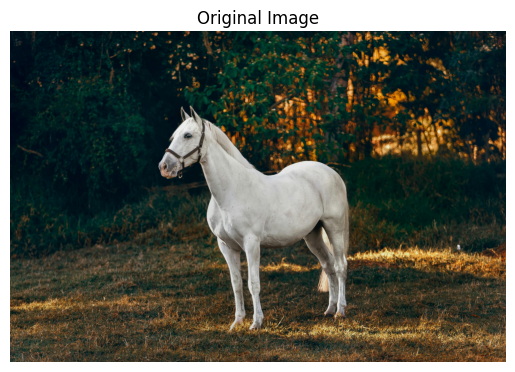

In [ ]:
import cv2
import matplotlib.pyplot as plt
from PIL import Image

# Correct way to load the image using a file path
image_path = "/content/Horse.jpg.jpg"  # Ensure correct file name and extension
original = cv2.imread(image_path)  # Pass file path (not an image object)

# Convert from BGR to RGB for correct color display
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)

# Display the image
plt.imshow(original)
plt.title("Original Image")
plt.axis("off")
plt.show()


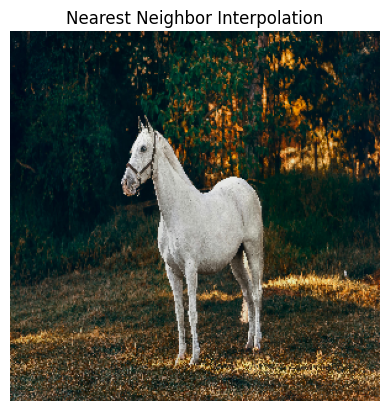

In [ ]:
# Resize using Nearest Neighbor
nni_resized = cv2.resize(original, (300, 300), interpolation=cv2.INTER_NEAREST)

# Show output
plt.imshow(nni_resized)
plt.title("Nearest Neighbor Interpolation")
plt.axis("off")
plt.show()


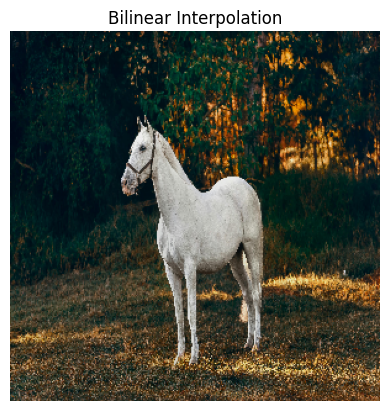

In [ ]:
# Resize using Bilinear Interpolation
bilinear_resized = cv2.resize(original, (300, 300), interpolation=cv2.INTER_LINEAR)

# Show output
plt.imshow(bilinear_resized)
plt.title("Bilinear Interpolation")
plt.axis("off")
plt.show()


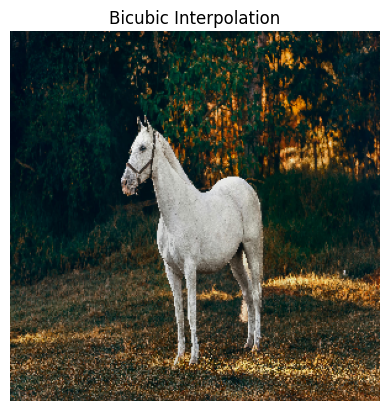

In [ ]:
# Resize using Bicubic Interpolation
bicubic_resized = cv2.resize(original, (300, 300), interpolation=cv2.INTER_CUBIC)

# Show output
plt.imshow(bicubic_resized)
plt.title("Bicubic Interpolation")
plt.axis("off")
plt.show()


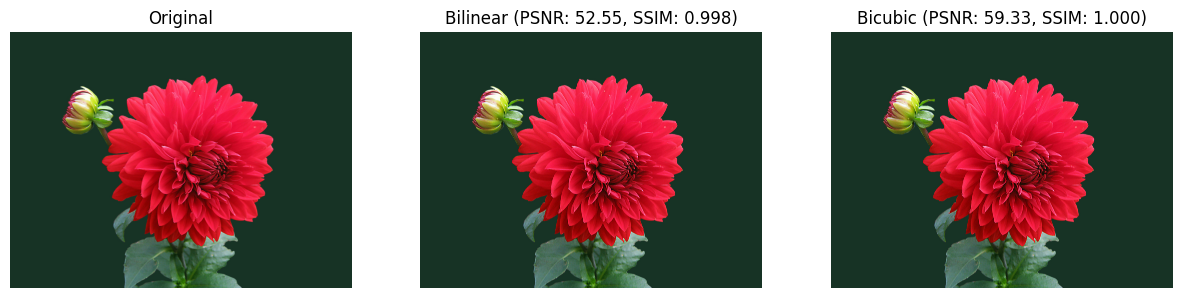

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim

# Load the image
image_path = "/content/pexels-pixabay-60597.jpg"  # Update with your image path
original = cv2.imread(image_path, cv2.IMREAD_COLOR)
original = cv2.cvtColor(original, cv2.COLOR_BGR2RGB)  # Convert to RGB

# Resize dimensions
scale_factor = 2  # Upscaling factor
new_size = (original.shape[1] * scale_factor, original.shape[0] * scale_factor)

# Apply Bilinear Interpolation
bilinear_resized = cv2.resize(original, new_size, interpolation=cv2.INTER_LINEAR)

# Apply Bicubic Interpolation
bicubic_resized = cv2.resize(original, new_size, interpolation=cv2.INTER_CUBIC)

# Compute PSNR and SSIM
psnr_bilinear = psnr(original, cv2.resize(bilinear_resized, original.shape[1::-1]))
psnr_bicubic = psnr(original, cv2.resize(bicubic_resized, original.shape[1::-1]))
ssim_bilinear = ssim(original, cv2.resize(bilinear_resized, original.shape[1::-1]), channel_axis=2)
ssim_bicubic = ssim(original, cv2.resize(bicubic_resized, original.shape[1::-1]), channel_axis=2)

# Display Results
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
titles = ["Original", f"Bilinear (PSNR: {psnr_bilinear:.2f}, SSIM: {ssim_bilinear:.3f})",
          f"Bicubic (PSNR: {psnr_bicubic:.2f}, SSIM: {ssim_bicubic:.3f})"]

images = [original, bilinear_resized, bicubic_resized]

for ax, img, title in zip(axes, images, titles):
    ax.imshow(img)
    ax.set_title(title)
    ax.axis("off")

plt.show()
